In [2]:
%matplotlib inline
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.stats import stats


from biosppy.signals import tools as st
from biosppy.signals import eda
from biosppy.signals import ecg
from biosppy.signals import emg
from biosppy.signals import resp
from biosppy.signals import tools as st
from biosppy import plotting, utils

from scipy import signal

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# General purpose function
# =============================
# Common statistics
def signal_stats(signal=None):
    """Compute various metrics describing the signal.
    Parameters
    ----------
    signal : array
        Input signal.
    Returns
    -------
    mean : float
        Mean of the signal.
    median : float
        Median of the signal.
    max : float
        Maximum signal amplitude.
    var : float
        Signal variance (unbiased).
    std_dev : float
        Standard signal deviation (unbiased).
    abs_dev : float
        Absolute signal deviation.
    kurtosis : float
        Signal kurtosis (unbiased).
    skew : float
        Signal skewness (unbiased).
    """
    
    # check inputs
    if signal is None:
        raise TypeError("Please specify an input signal.")
    l= len(signal)
    
    # ensure numpy
    signal = np.array(signal)

    # mean
    mean = np.mean(signal)

    # median
    if l>1:
        median = np.median(signal)
    else:
        median = float('nan')
        
    # maximum amplitude
    maxAmp = signal.max()
    
    # minimum amplitude
    minAmp = signal.min()
    
    # range
    rangeAmp = signal.max()-signal.min()
    
    # variance
    sigma2 = signal.var(ddof=1)

    # standard deviation
    sigma = signal.std(ddof=1)

    # mean first order diviation
    if l>1:
        mfd = np.mean(np.diff(signal))
    else:
        mfd =0
        
    # max gradient
    if l>1:
        mg = np.diff(signal).max()
    else:
        mg = 0
        
    # absolute deviation
    if l>1:
        ad = np.sum(np.abs(signal - median))
    else:
        ad=0
        
    # kurtosis
    kurt = stats.kurtosis(signal, bias=False)

    # skweness
    skew = stats.skew(signal, bias=False)

    # output
    args = (mean, median, maxAmp, minAmp, rangeAmp, sigma2, sigma, mfd, mg, ad, kurt, skew)
    names = ('mean', 'median', 'max','min','vrange', 'var', 'std_dev', 'avg_der','max_gra','abs_dev', 'kurtosis',
             'skewness')

    return (args,names)

# Down samping
def downsampling(signal,sampling_rate,new_rate):
    r=sampling_rate/new_rate
    n_signal=signal[range(0,len(signal),r)]
    rate=sampling_rate/(r*1.0)
    return {'sig':n_signal,'rate':rate}

height has been deprecated.



In [5]:
chunkdf=pd.read_csv('/home/wenlu/Documents/XPFIFA/biopacEvent20s/S_31_1011_.txt',sep='\t',nrows=20000,header=None,usecols=[0,1,3,6,7,9],names=['ts','rsp', 'emg_s','eda','ecg','emg_f'])
sig_emg=chunkdf['emg_s']
#emgd=downsampling(sig_emg,1000,40)
#signal=emgd['sig']
#sampling_rate=emgd['rate']
meansig=sig_emg.rolling(window=20).mean()
desig=sig_emg-meansig
square=np.square(desig)
to=square.rolling(window=40).sum()
tod=downsampling(to,1000,40)['sig']

In [43]:
to=square.rolling(window=160).sum()

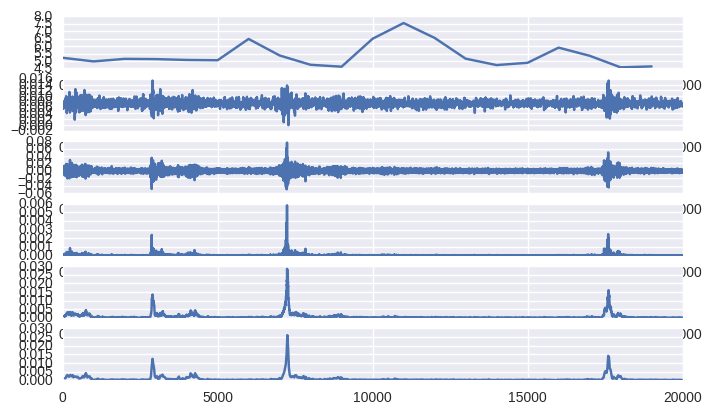

In [38]:
plt.subplot(7,1,1)
plt.plot(rspd)
plt.subplot(7,1,2)
plt.plot(meansig)
plt.subplot(7,1,3)
plt.plot(desig)
plt.subplot(7,1,4)
plt.plot(square)
plt.subplot(7,1,5)
plt.plot(to)
plt.subplot(7,1,6)
plt.plot(tod)

In [49]:
pd.concat([pd.Series(0),to],ignore_index=True)

0        0.000000
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
35            NaN
36            NaN
37            NaN
38            NaN
39            NaN
40            NaN
41            NaN
42            NaN
43            NaN
44            NaN
45            NaN
46            NaN
47            NaN
48            NaN
49            NaN
50            NaN
51            NaN
52            NaN
53            NaN
54            NaN
55        

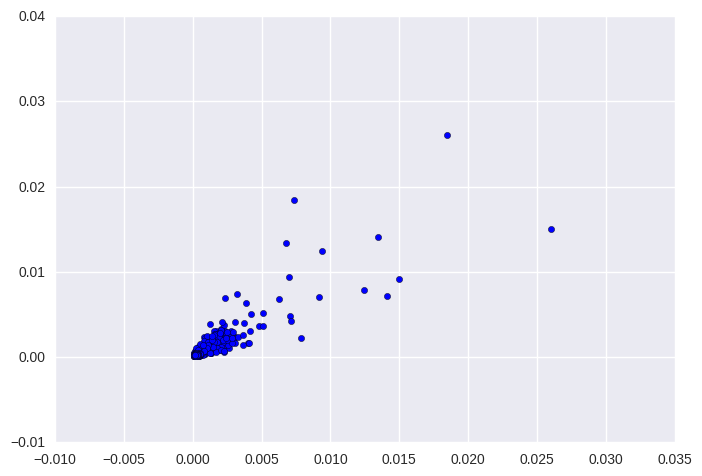

In [7]:
def poincare(ts):
    x=ts
    y=pd.concat([pd.Series(0),ts],ignore_index=True)
    y=y[:-1]
    plt.scatter(x,y)
poincare(tod)

In [55]:
np.array(to[1000:1003])

array([ 0.00342836,  0.00333403,  0.00313307])

In [10]:
ts=pd.Series(np.array(range(10))*2, index=range(10))
ts[np.arange(0,len(ts),2)][:3]

0    0
2    4
4    8
dtype: int64

In [22]:
tod.reset_index(drop=True)

0      0.001152
1      0.001297
2      0.002396
3      0.003013
4      0.002769
5      0.002010
6      0.002403
7      0.003105
8      0.002334
9      0.002287
10     0.003010
11     0.001727
12     0.002253
13     0.002161
14     0.002101
15     0.001728
16     0.002114
17     0.001743
18     0.000992
19     0.001188
20     0.001108
21     0.001366
22     0.001583
23     0.002484
24     0.001757
25     0.001695
26     0.003085
27     0.004150
28     0.003101
29     0.001581
30     0.002043
31     0.002331
32     0.002248
33     0.001008
34     0.001275
35     0.000707
36     0.000241
37     0.000165
38     0.000277
39     0.000440
40     0.000383
41     0.000335
42     0.000891
43     0.000924
44     0.000545
45     0.000370
46     0.000364
47     0.000442
48     0.000528
49     0.000646
50     0.000375
51     0.000344
52     0.000327
53     0.000322
54     0.000252
55     0.000216
56     0.000299
57     0.000196
58     0.000275
59     0.000478
60     0.000289
61     0.000524
62     0

[[ 0.          0.00816797  0.01465333 ...,  0.91892865  0.91210193
   0.90586992]
 [ 0.00816797  0.          0.00698964 ...,  0.91082072  0.90399733
   0.89776739]
 [ 0.01465333  0.00698964  0.         ...,  0.9047897   0.89795512
   0.8917463 ]
 ..., 
 [ 0.91892865  0.91082072  0.9047897  ...,  0.          0.00821925
   0.01402229]
 [ 0.91210193  0.90399733  0.89795512 ...,  0.00821925  0.          0.00826477]
 [ 0.90586992  0.89776739  0.8917463  ...,  0.01402229  0.00826477  0.        ]]


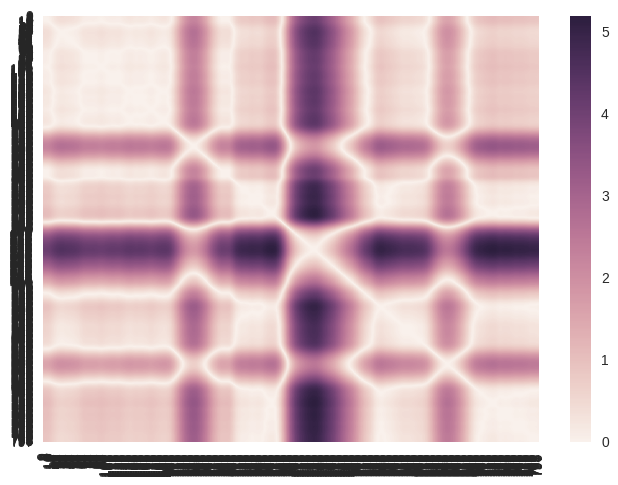

In [34]:
from scipy.spatial.distance import pdist,squareform
def RPplot(ts,embed=3,pas=1):
    ts=ts.reset_index(drop=True)
    thr=(max(ts)-min(ts))*0.01
    l=(len(ts)-embed)/pas +1 
    w=embed
    Xt=np.zeros((l,w))
    for i in np.arange(embed):
        #print ts[np.arange(i*pas,len(ts),pas)][:l]
        Xt[:,i]=ts[np.arange(i*pas,len(ts),pas)][:l]
    Y = squareform(pdist(Xt, 'euclidean')) 
    print(Y)
    #ax = sns.heatmap(Y<thr)
    ax = sns.heatmap(Y)
RPplot(rspd)   

In [30]:
rspd

0        5.21393
25       5.20966
50       5.20416
75       5.19989
100      5.19928
125      5.19470
150      5.19409
175      5.18951
200      5.18951
225      5.18463
250      5.17975
275      5.17029
300      5.16052
325      5.14832
350      5.13123
375      5.11627
400      5.10223
425      5.08240
450      5.06836
475      5.05371
500      5.03662
525      5.02441
550      5.00916
575      4.99969
600      4.99023
625      4.98047
650      4.97040
675      4.96613
700      4.96124
725      4.95605
750      4.95148
775      4.95117
800      4.95148
825      4.95087
850      4.95056
875      4.95636
900      4.96094
925      4.95972
950      4.96582
975      4.97040
1000     4.97009
1025     4.97589
1050     4.97589
1075     4.98047
1100     4.98047
1125     4.97986
1150     4.98474
1175     4.98505
1200     4.99023
1225     4.99023
1250     4.99573
1275     5.00000
1300     5.00488
1325     5.00977
1350     5.01404
1375     5.01953
1400     5.02441
1425     5.03387
1450     5.038

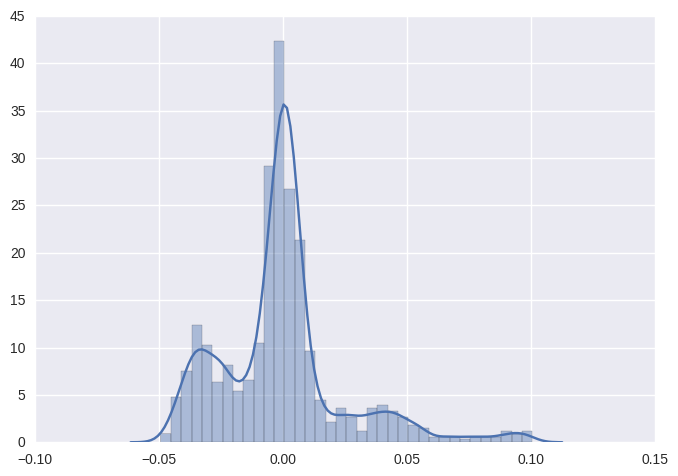

In [36]:
ax = sns.distplot(np.diff(rspd))

[[ 0.          0.14407684  0.27370599 ...,  0.93075887  0.91355149
   0.88769218]
 [ 0.14407684  0.          0.14718478 ...,  0.81051896  0.79576466
   0.77033039]
 [ 0.27370599  0.14718478  0.         ...,  0.66954768  0.65433138
   0.63003172]
 ..., 
 [ 0.93075887  0.81051896  0.66954768 ...,  0.          0.03148275
   0.0522844 ]
 [ 0.91355149  0.79576466  0.65433138 ...,  0.03148275  0.          0.03157127]
 [ 0.88769218  0.77033039  0.63003172 ...,  0.0522844   0.03157127  0.        ]]


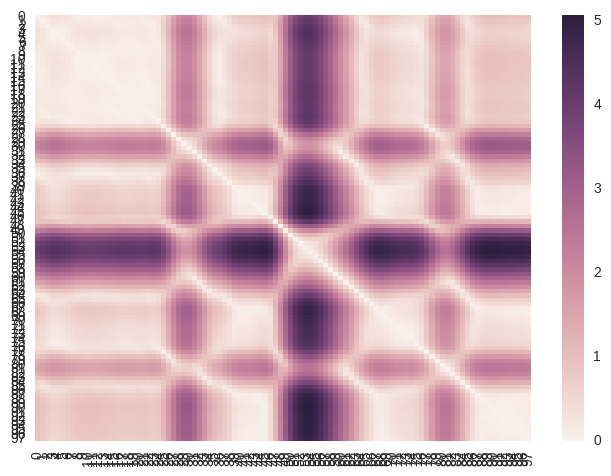

In [39]:
rspd=downsampling(chunkdf['rsp'],1000,5)['sig']
RPplot(rspd)  